In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn import preprocessing

%matplotlib inline

### Loading and Pre-Processing Data

In [2]:
train_df = pd.read_csv("Data/mnist-train.csv")
valid_df = pd.read_csv("Data/mnist-test.csv")

X_train = train_df.drop(['label'], axis=1).values.astype('float32')
y_train = train_df['label'].values
X_valid = valid_df.values.astype('float32')

del train_df
del valid_df

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

img_rows = 28
img_cols = 28
n_targets = 10

input_shape = (img_rows, img_cols, 1)

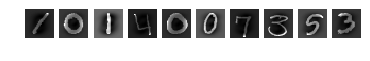

In [3]:
# The data that we are interested in is made of 28x28 images of digits, let's
# have a look at the first images, stored in X_train. For these
# images, we know which digit they represent: it is given by the correspondent y_train.
images_and_labels = list(zip(X_train, y_train))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 10, index + 1)
    plt.axis('off')
    plt.imshow(image.reshape(img_rows, img_cols), cmap='gray', interpolation='nearest')

### Visualization

In [4]:
def plot_history(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')

### Convolutional Neural Networks

In [5]:
import os

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras import optimizers

Using TensorFlow backend.


In [6]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_valid = X_valid.reshape(X_valid.shape[0], img_rows, img_cols, 1)

In [7]:
# The y_train is not split into 10 distinct class labels, but rather 
# are represented as a single array with the class values
y_train = to_categorical(y_train)

#### Model Architecture

---

1. Basic Concepts:   
    * [2D Convolution](https://keras.io/layers/convolutional/#convolution2d)
    
    The main concept to implement a CNN. This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
    
    * [Max Pooling](https://keras.io/layers/pooling/#maxpooling2d)
    
    Reduces the size of the filter maps, by applying a max filter to non-overlapping subregions. A max pooling layer with pooling_size=2 will reduce the number total number of parameters in the filter map by a factor of 4.
    
    * [Dropout](https://keras.io/layers/core/#dropout)
    
   Consists in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.
   
   * [Flatten](https://keras.io/layers/core/#flatten)
   
   Flattens the input. Does not affect the batch size.
   
   * [Dense](https://keras.io/layers/core/#dense)
   
   Just a regular densely-connected NN layer.
   
   * [Activation](https://keras.io/layers/core/#activation)
   
   Applies an activation function to an output.

2. Architecture:

    * Sequential Model
    * Convolutional Layer 
    * MaxPooling
    * Convolutional Layer 
    * MaxPooling
    * Dropout
    * Dense Layer

3. Obs:

     * [Epoch vs Batch Size vs Iterations](https://stackoverflow.com/questions/4752626/epoch-vs-iteration-when-training-neural-networks)
     * [Optimizers](https://keras.io/optimizers/)
     * [Loss Functions](https://keras.io/losses/)

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(6, 6), activation='relu', input_shape=input_shape, padding='valid'))
model.add(Conv2D(64, kernel_size=(6, 6), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(n_targets, activation='softmax'))

In [9]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy',  metrics=['accuracy'])
hist = model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=2, validation_split=0.33)

Train on 28139 samples, validate on 13861 samples
Epoch 1/10
101s - loss: 0.3208 - acc: 0.9062 - val_loss: 0.1159 - val_acc: 0.9639
Epoch 2/10
100s - loss: 0.1350 - acc: 0.9623 - val_loss: 0.0560 - val_acc: 0.9818
Epoch 3/10
100s - loss: 0.1015 - acc: 0.9694 - val_loss: 0.0428 - val_acc: 0.9870
Epoch 4/10
99s - loss: 0.0875 - acc: 0.9749 - val_loss: 0.0497 - val_acc: 0.9851
Epoch 5/10
98s - loss: 0.0766 - acc: 0.9775 - val_loss: 0.0420 - val_acc: 0.9862
Epoch 6/10
96s - loss: 0.0655 - acc: 0.9799 - val_loss: 0.0361 - val_acc: 0.9890
Epoch 7/10
98s - loss: 0.0558 - acc: 0.9833 - val_loss: 0.0364 - val_acc: 0.9885
Epoch 8/10
97s - loss: 0.0659 - acc: 0.9803 - val_loss: 0.0488 - val_acc: 0.9854
Epoch 9/10
100s - loss: 0.0572 - acc: 0.9829 - val_loss: 0.0317 - val_acc: 0.9910
Epoch 10/10
97s - loss: 0.0484 - acc: 0.9860 - val_loss: 0.0327 - val_acc: 0.9899


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


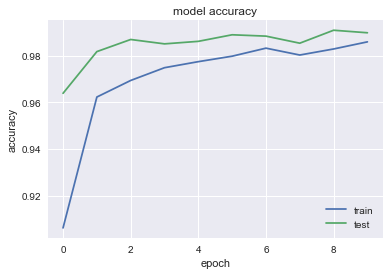

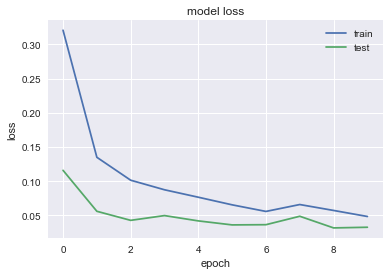

In [10]:
plot_history(hist)

In [12]:
pred = model.predict_classes(X_valid)

np.savetxt('mnist-output.csv', np.c_[range(1,len(pred)+1),pred], delimiter=',', header = 'ImageId,Label', comments = '', fmt='%d')

28000/28000 [==============================] - 30s    
